<a href="https://colab.research.google.com/github/PikunMohanta/CC-FEB-DATA_SCIENCE/blob/main/Task2_Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
movies = pd.read_csv("/content/drive/MyDrive/CodeClause/movies_new.csv")

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5999 non-null   int64  
 1   id          5999 non-null   int64  
 2   title       5999 non-null   object 
 3   year        5999 non-null   object 
 4   overview    5999 non-null   object 
 5   ratings     5999 non-null   float64
 6   genres      5999 non-null   object 
 7   popularity  5999 non-null   int64  
 8   cast        5999 non-null   object 
 9   poster      5998 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 468.8+ KB


In [ ]:
movies.shape

(5999, 10)

In [ ]:
movies.describe()

,Unnamed: 0,id,ratings,popularity
count,5999.000000,5999.000000,5999.000000,5.999000e+03
mean,2999.511419,2999.511419,6.756676,1.050035e+05
std,1732.339305,1732.339305,1.124007,1.774691e+05
min,0.000000,0.000000,1.600000,1.700000e+01
25%,1499.500000,1499.500000,6.100000,1.426850e+04
50%,3000.000000,3000.000000,6.800000,4.346700e+04
75%,4499.500000,4499.500000,7.500000,1.148225e+05
max,5999.000000,5999.000000,9.700000,2.662110e+06


In [ ]:
genres=[]
for genre in movies.genres:
    
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    
movie_title=[]
for title in movies.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)    

In [ ]:
wordcloud_genre=WordCloud(width=1500,height=800,min_font_size=2,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,min_font_size=2,min_word_length=3).generate(movie_title)

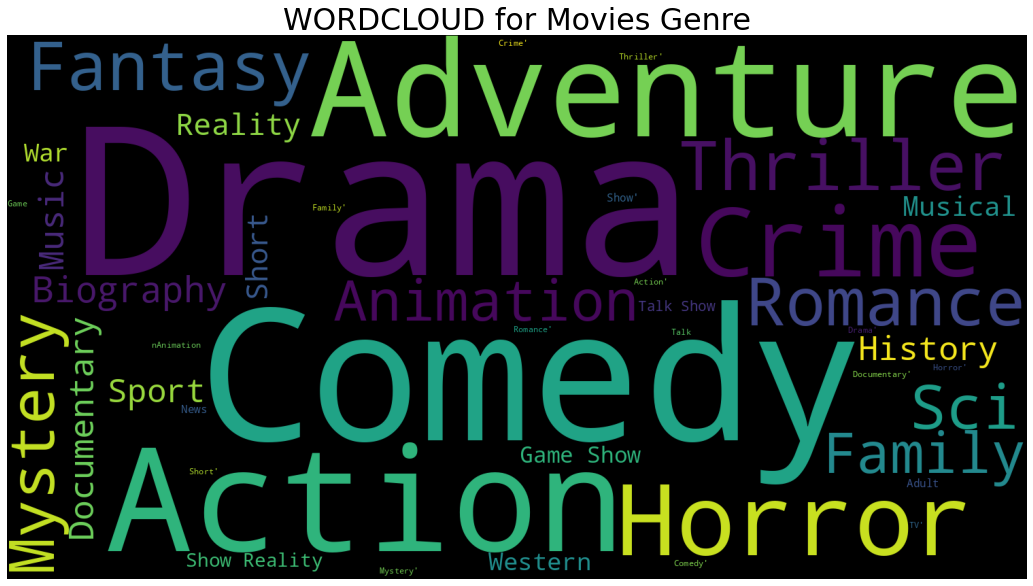

In [ ]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre)

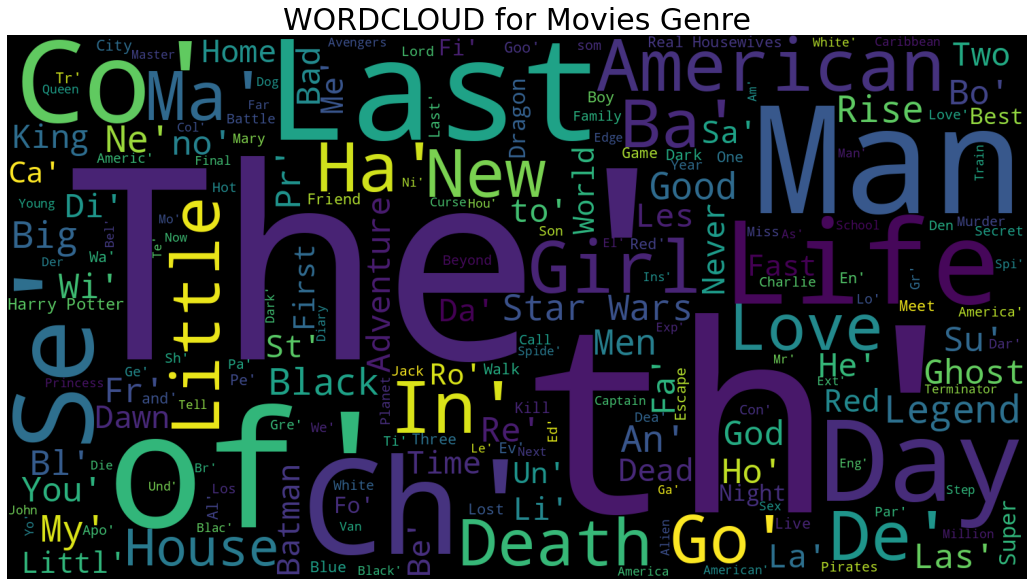

In [ ]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=30)
plt.imshow(wordcloud_title)

In [ ]:
movies.head()

,Unnamed: 0,id,title,year,overview,ratings,genres,popularity,cast,poster
0,0,0,The Walking Dead,2022,Sheriff Deputy Rick Grimes wakes up from a com...,8.1,"Drama, Horror, Thriller",999787,"Andrew Lincoln,Norman Reedus,Melissa McBride,L...",https://m.media-amazon.com/images/M/MV5BOGFiZj...
1,1,1,Jack Ryan,2018,"Up-and-coming CIA analyst, Jack Ryan, is thrus...",8.0,"Action, Drama, Thriller",138760,"John Krasinski,Wendell Pierce,Michael Kelly,Jo...",https://m.media-amazon.com/images/M/MV5BOGFiZj...
2,2,2,Knives Out,2019,A detective investigates the death of the patr...,7.9,"Comedy, Crime, Drama",687013,"Rian Johnson,Daniel Craig,Chris Evans,Ana de A...",https://m.media-amazon.com/images/M/MV5BOGFiZj...
3,3,3,Game of Thrones,2019,Nine noble families fight for control over the...,9.2,"Action, Adventure, Drama",2110375,"Emilia Clarke,Peter Dinklage,Kit Harington,Len...",https://m.media-amazon.com/images/M/MV5BOGFiZj...
4,4,4,Avatar,2009,A paraplegic Marine dispatched to the moon Pan...,7.9,"Action, Adventure, Fantasy",1306723,"James Cameron,Sam Worthington,Zoe Saldana,Sigo...",https://m.media-amazon.com/images/M/MV5BOGFiZj...


In [ ]:
df1=movies.groupby(['title'])[['ratings']].sum()
high_rated=df1.nlargest(20,'ratings')
high_rated.head()

,ratings
title,
Kingdom,25.3
Life,24.0
Death Note: Desu nôto,23.6
Rush,23.3
Taken,22.2


<BarContainer object of 20 artists>

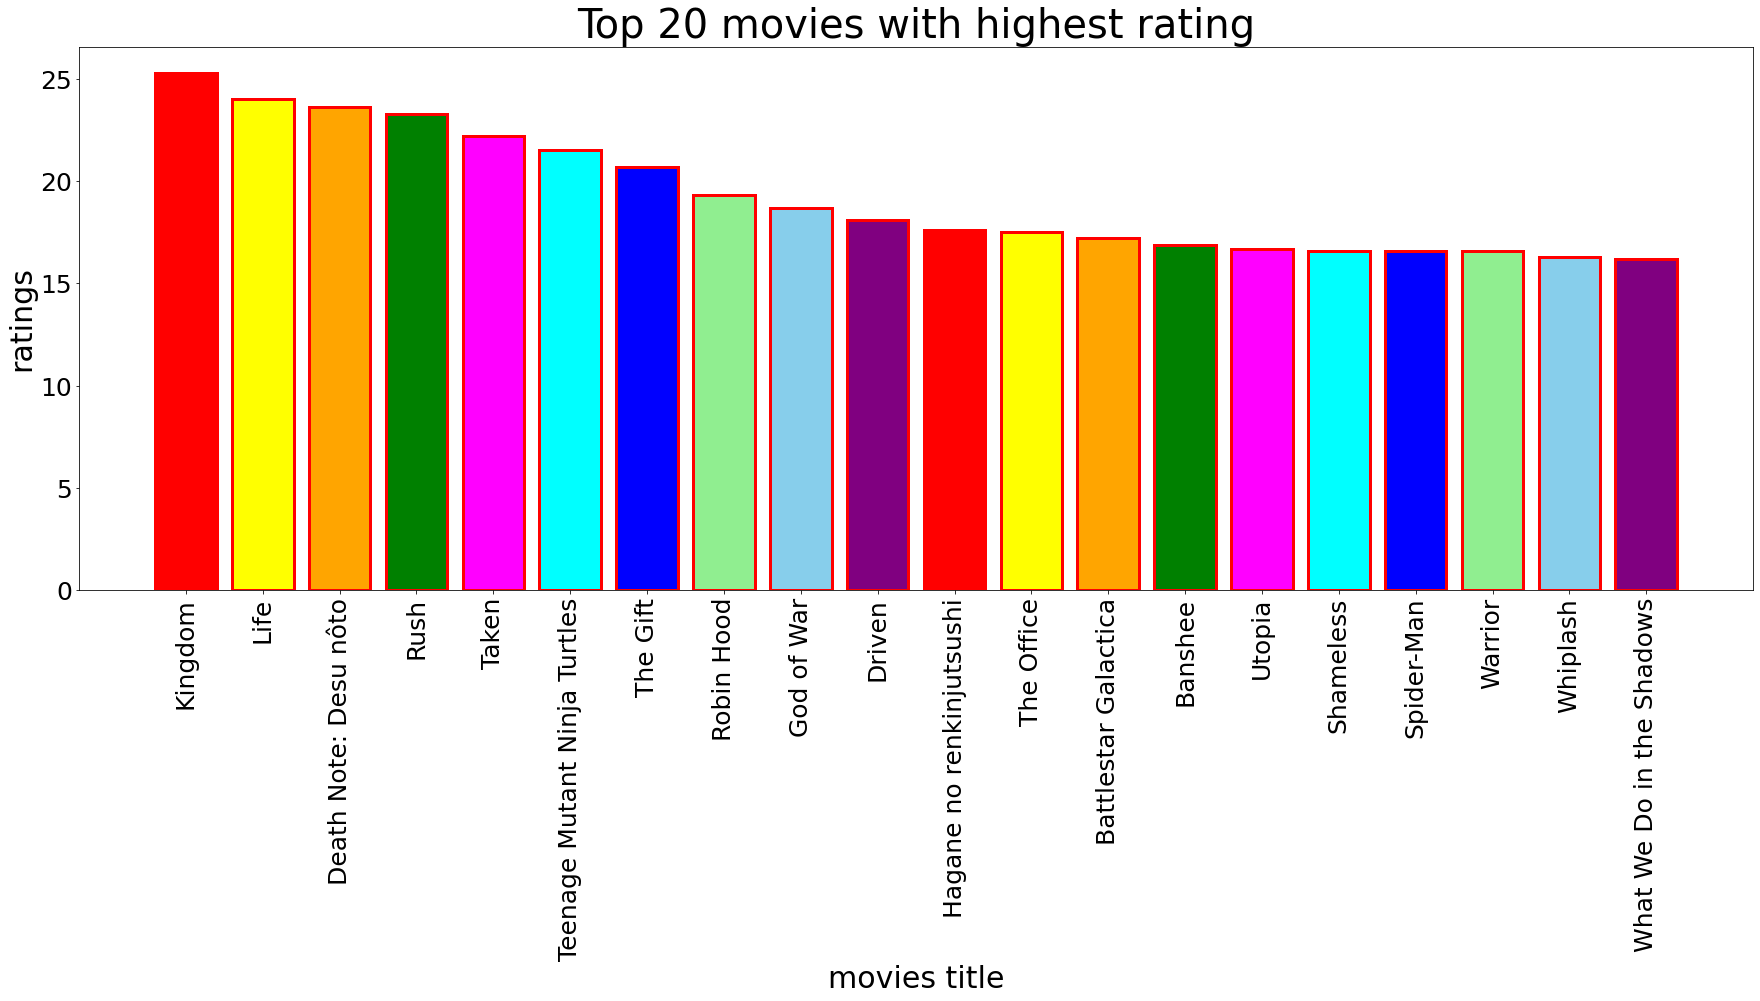

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=40)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['ratings'],linewidth=3,edgecolor='red',color=colors)

In [ ]:
df2=movies.groupby('title')[['ratings']].count()
rating_count_20=df2.nlargest(20,'ratings')
rating_count_20.head()

,ratings
title,
Death Note: Desu nôto,3
Driven,3
Kingdom,3
Life,3
Robin Hood,3


<BarContainer object of 20 artists>

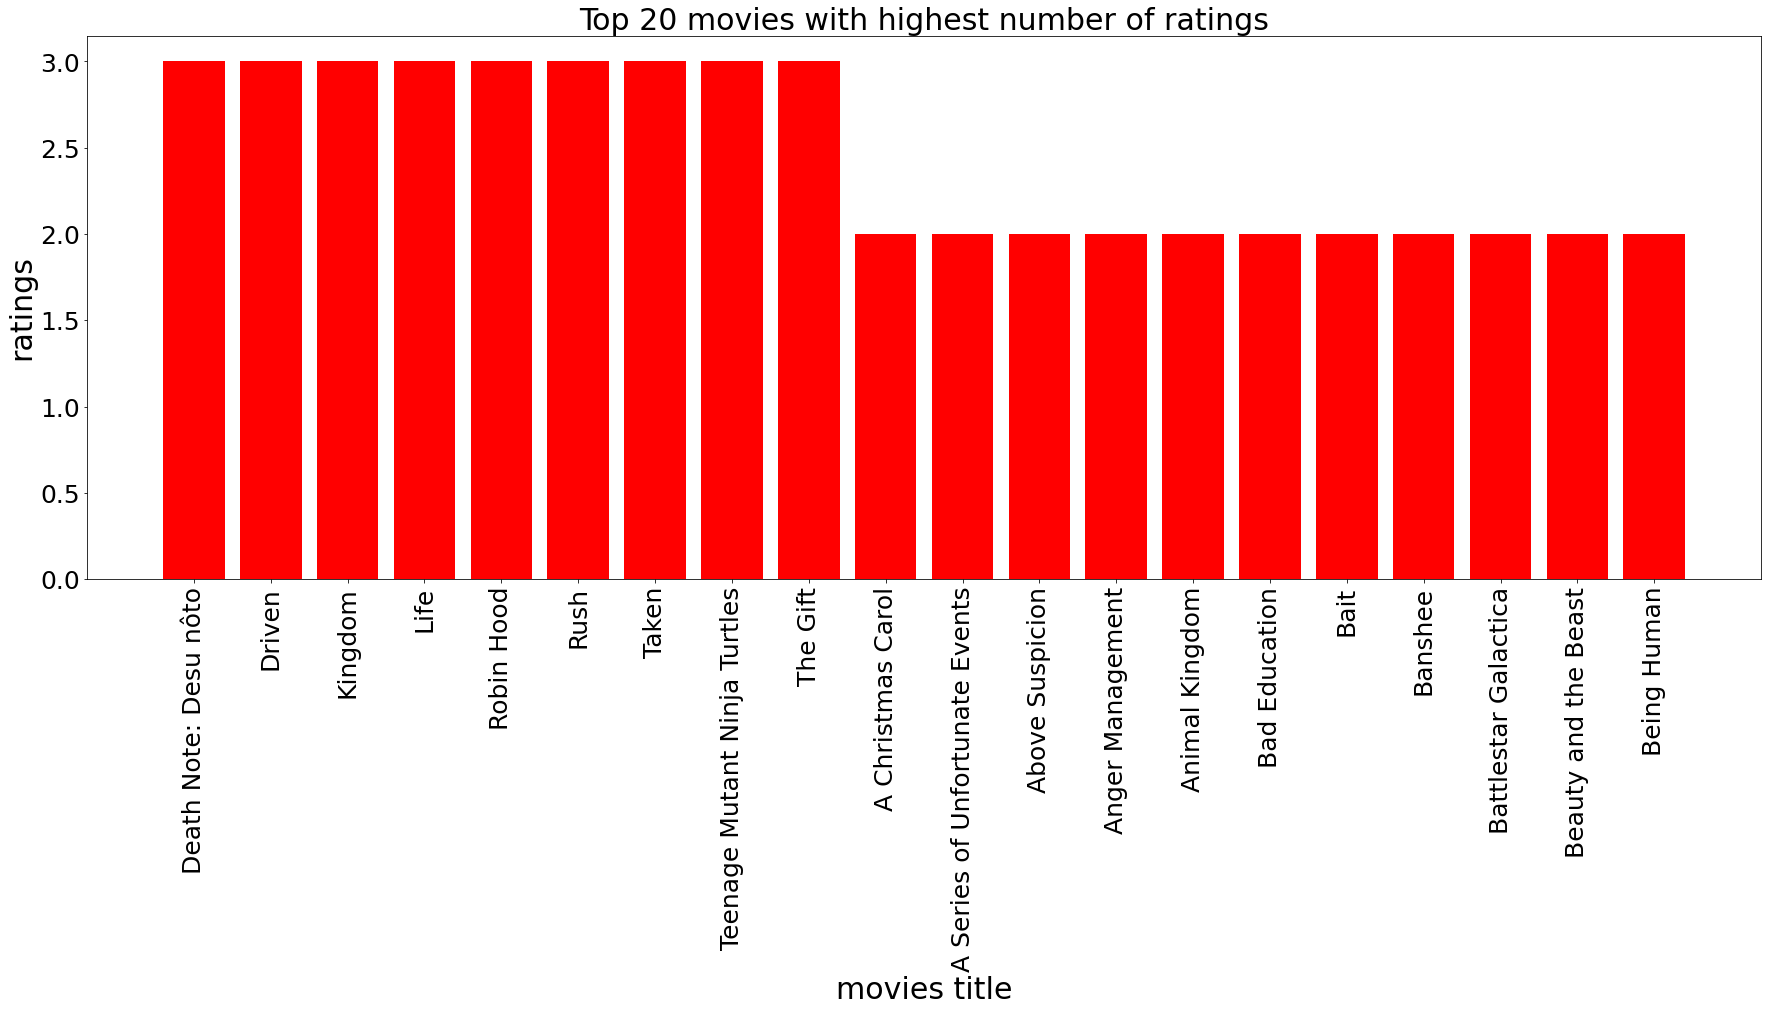

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest number of ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('movies title',fontsize=30)
plt.ylabel('ratings',fontsize=30)

plt.bar(rating_count_20.index,rating_count_20.ratings,color='red')

In [ ]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(movies['genres'])

In [ ]:
movie_user = movies.pivot_table(index='id',columns='title',values='ratings')
movie_user.head()

title,(500) Days of Summer,10 Cloverfield Lane,10 Minutes Gone,10 Years,"10,000 BC",100 Girls,10x10,11.22.63,12 Feet Deep,12 Monkeys,...,xXx,xXx: Return of Xander Cage,xXx: State of the Union,À l'intérieur,À ma soeur!,Æon Flux,Çukur,Élite,Ófærð,Ôkami kodomo no Ame to Yuki
id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
indices=pd.Series(movies.index,index=movies['title'])
titles=movies['title']
def recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [ ]:
recommendations('The Boys')

109              The Gentlemen
135                      Barry
295                   Baywatch
393                   Kick-Ass
435             21 Jump Street
469              The Nice Guys
566              Ocean's Eight
615              American Made
641                Logan Lucky
693             Murder Mystery
805             The Other Guys
905       Central Intelligence
995                        RED
1038         Pineapple Express
1205              Cold Pursuit
1254            22 Jump Street
1283                Kick-Ass 2
1423    The Hitman's Bodyguard
1432          Mr. & Mrs. Smith
1463             Lethal Weapon
Name: title, dtype: object